In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')

In [61]:
#IMPORT THE DATASET
df = pd.read_csv("/Users/shiksharawat/Desktop/cheese.csv")

In [62]:
df.head()

,RETAILER,VOLUME,DISP,PRICE
1,LOS ANGELES - LUCKY,21374,0.162000,2.578460
2,LOS ANGELES - RALPHS,6427,0.124113,3.727867
3,LOS ANGELES - VONS,17302,0.102000,2.711421
4,CHICAGO - DOMINICK,13561,0.027591,2.651206
5,CHICAGO - JEWEL,42774,0.090613,1.986674


In [63]:
#volume is the units of a product sold at any time t(target). 
#Disp is measure between 0 and 1 which indicates the level of investment done for advertisement at time t.
#Price is the cost of the concerned product.

In [64]:
#We are not yet looking at hierarchical models, so we focus on one retailer, say Dominick’s in Chicago. 
new_df = df[df['RETAILER'] == 'CHICAGO - DOMINICK']
new_df.drop(columns = 'RETAILER', inplace = True)

In [65]:
new_df.describe()

,VOLUME,DISP,PRICE
count,61.000000,61.000000,61.000000
mean,13675.540984,0.244020,2.939939
std,20115.521986,0.238272,0.526535
min,4275.000000,0.000000,1.319992
25%,5675.000000,0.027591,2.961931
50%,6540.000000,0.193000,3.158916
75%,8462.000000,0.408000,3.242890
max,103763.000000,0.816000,3.293942


In [66]:
#Points to be noticed:
#Very large standard deviation in volume. 
#No need to normalize the target.
#Disp and Price are already scaled.


In [67]:
new_df.head()

,VOLUME,DISP,PRICE
4,13561,0.027591,2.651206
91,5937,0.004141,2.652181
178,5151,0.006174,3.293924
265,5734,0.012365,3.290896
352,5695,0.000000,3.293942


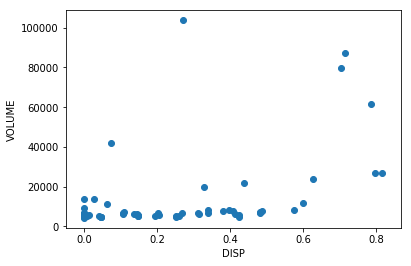

In [68]:
plt.scatter(new_df['DISP'],new_df['VOLUME'])
plt.xlabel('DISP')
plt.ylabel('VOLUME')
plt.show()

In [ ]:
#above plot shows that volume may decrease even when more degree of advertisemet increases 

Text(0,0.5,'disp')

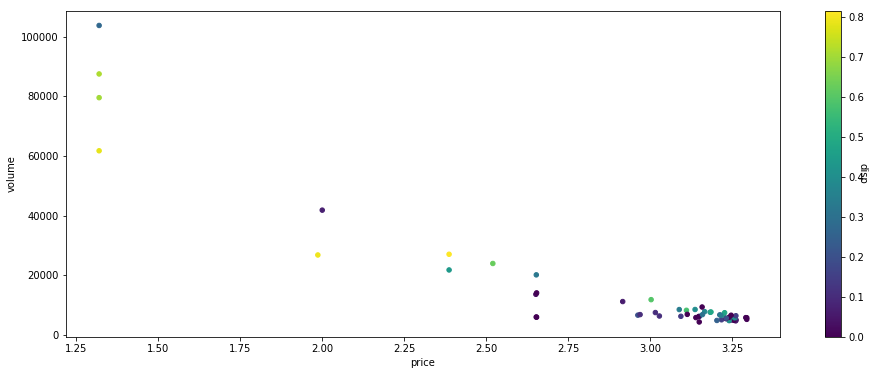

In [76]:

fig, axs = plt.subplots(1 , 1, figsize=(16,6))

im = axs.scatter(new_df['PRICE'], new_df['VOLUME'], c=np.clip(new_df['DISP'], 0, 1), 
                     cmap='viridis', alpha=1.0, s=20)
axs.set_xlabel('price')
#axs.set_xlim()
axs.set_ylabel('volume')
cbar = fig.colorbar(im, ax=axs)
cbar.ax.set_ylabel('disp', rotation=270)
    


In [77]:
#volume sold for products with very high price is low maybe because for them disp is also low.

In [78]:
#Lets start with a very basic linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
copy = new_df.copy()
#print(df.head())
#print(target)
target  = new_df['VOLUME']
copy.drop(columns = 'VOLUME' , inplace = True)
X_train, X_test, y_train, y_test= train_test_split(copy, target , random_state=111)
reg = LinearRegression().fit(X_train, y_train)
print('Mean Squared Error :',mean_squared_error(y_test, reg.predict(X_test)))

Mean Squared Error : 27173536.226761237


In [81]:
#cleary very high error.

In [82]:
#There are some effect of advertising on sales, lets consider them one by one.

In [83]:
#Exposure to advertising today has effects on consumers’ purchasing decisions in the future.
#Also,the effect of ad exposure on purchasing decisions decays with time.

#We can incorporate Effects 1 and 2 into the above model by incorporating 
#the lagged effects of all previous ad exposures. This model is given by
    
                     #yt = β0 + β1st + εt
                      
                      #st = xt + λst − 1

In [84]:
#To incorporate above changes I am introducing new feature st.
#lets randomly assume value of λ to be 0.1. Effect of different values of λ will be analized later.

#The rows in the dataset are monthly collected data for the retailer one after the other.
#So we have to consider effect of disp value of a row on the row below it.
a = [0]
for i in new_df['DISP']:
    a.append(i)
    
del a[-1] #value of last row need not be added anywhere.
b = []
b = np.array(a)
#print(b)


In [85]:
new_df['X'] = b

In [86]:
new_df.head()

,VOLUME,DISP,PRICE,X
4,13561,0.027591,2.651206,0.000000
91,5937,0.004141,2.652181,0.027591
178,5151,0.006174,3.293924,0.004141
265,5734,0.012365,3.290896,0.006174
352,5695,0.000000,3.293942,0.012365


In [87]:
#corrected the total disp.
new_df['DISP'] = new_df['DISP'] + 0.1*new_df['X']
new_df.drop(columns = 'X',inplace = True)
new_df.head()

,VOLUME,DISP,PRICE
4,13561,0.027591,2.651206
91,5937,0.006900,2.652181
178,5151,0.006588,3.293924
265,5734,0.012982,3.290896
352,5695,0.001236,3.293942


Text(0,0.5,'disp')

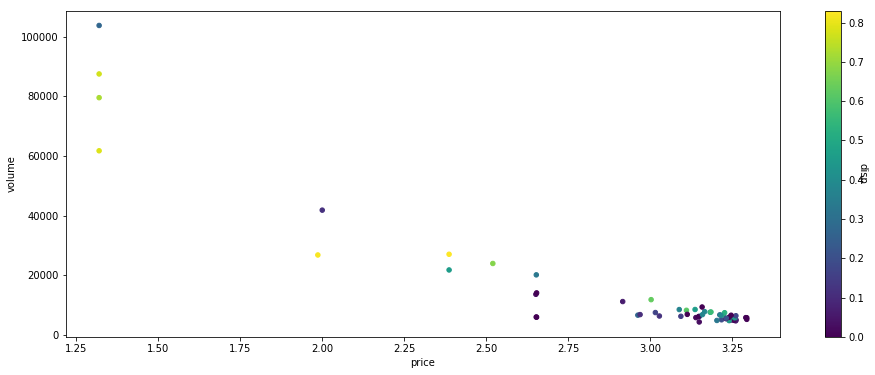

In [88]:
fig, axs = plt.subplots(1 , 1, figsize=(16,6))

im = axs.scatter(new_df['PRICE'], new_df['VOLUME'], c=np.clip(new_df['DISP'], 0, 1), 
                     cmap='viridis', alpha=1.0, s=20)
axs.set_xlabel('price')
#axs.set_xlim()
axs.set_ylabel('volume')
cbar = fig.colorbar(im, ax=axs)
cbar.ax.set_ylabel('disp', rotation=270)
    

In [89]:
#lets fit the model again and calculate mse. 

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
copy = new_df.copy()
#print(df.head())
#print(target)
target  = new_df['VOLUME']
copy.drop(columns = 'VOLUME' , inplace = True)
X_train, X_test, y_train, y_test= train_test_split(copy, target , random_state=111)
reg = LinearRegression().fit(X_train, y_train)
print('Mean Squared Error :',mean_squared_error(y_test, reg.predict(X_test)))

Mean Squared Error : 26257329.672330733


In [46]:
#The effect of ad exposure on sales is subject to the law of diminishing returns.
#Changing the level of ad exposure brings about a relative change in sales volumes.

In [47]:
#To clearly express Effect 3, we rewrite the above equation as follows
                 
                          #yt=β0+β1xt+λβ1st−1+εt

#The above expression implies that the rate of change of sales volumes with respect to ad exposure in the same time period is constant, 
#i.e, ∂yt/∂xt=β1. However, Effect 3 implies that this rate tapers off as we increase ad exposure.


#Several functions satisfy this property(Joy 2006), e.g, the log function and the logistic function. We pick the logistic function with 
#parameter α for its flexibility. The model now becomes

                        #yt=β0+β1st+εt
                      
                        #st=1/ 1+e−αxt + λst

In [91]:
#lets implement the above effects.

In [92]:
#let alpha be -2.
df = pd.read_csv("/Users/shiksharawat/Desktop/cheese.csv")
new_df = df[df['RETAILER'] == 'CHICAGO - DOMINICK']
new_df.drop(columns = 'RETAILER', inplace = True)

a = [0]
for i in new_df['DISP']:
    a.append(i)
    
del a[-1] #value of last row need now be added anywhere.
b = []
b = np.array(a)

new_df['X'] = b

def disp(d):
    a = 1 / (1 + np.exp((-2)*d))
    return(a)
    

new_df['DISP'] = disp(new_df['DISP'])

new_df['DISP'] = new_df['DISP'] + 0.1*new_df['X']
new_df.drop(columns = 'X',inplace = True)
new_df.head()

,VOLUME,DISP,PRICE
4,13561,0.513792,2.651206
91,5937,0.504829,2.652181
178,5151,0.503501,3.293924
265,5734,0.506799,3.290896
352,5695,0.501236,3.293942


In [93]:
#Crrent equation implies that the increase in sales from increase in ad exposure is 
#independent of volume which was being sold earlier to advertisement. In other words, it is absolute.
#In practice, we usually see that sales increase in a relative manner.
#To consider this effect lets take log of target to make it relative.

In [52]:
def volume(p):
    return(np.log(p))
    

new_df['log_volume'] = volume(new_df['VOLUME'])

In [53]:
new_df.drop(columns = 'VOLUME',inplace = True)

In [ ]:
#In order to bring price into the model, we rely on the price elasticity of demand, 
#a measure of responsiveness of the quantity of the good demanded to a 
#change in its price. We can argue that sales volumes directly reflect 
#the demand for the product, assuming that production can keep up with demand linearly. 
#The price elasticity E is expressed as:
     
                   #E= (∂qt/qt) / (∂pt/pt)
        
#where pt is the price of the product at time t and qt is the quantity of the product demanded. 
#Assuming sales volumes are directly proportional to quantity demanded, 
#we can write yt=kqt, where k is a constant of proportionality. Using this in the above expression we have


                   #(∂logyt/∂pt)= kElogpt
    
#We can readily merge kE into one term and include the above expression into the regression model. Finally, we have

                  #logyt=β0+β1st+β2logpt
    
                   #st= 1/(1+e−αxt) + λst 
    

In [50]:
def price(p):
    return(np.log(p))
    

new_df['log_price'] = price(new_df['PRICE'])


In [51]:
new_df.drop(columns = 'PRICE',inplace = True)

In [55]:
new_df.head()

,DISP,log_price,log_volume
4,0.513792,0.975015,9.514953
91,0.504829,0.975382,8.688959
178,0.503501,1.192080,8.546946
265,0.506799,1.191160,8.654169
352,0.501236,1.192085,8.647344


In [56]:
#Lets start with a very basic linear regression model.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
copy = new_df.copy()
#print(df.head())
#print(target)
target  = new_df['log_volume']
copy.drop(columns = 'log_volume' , inplace = True)
X_train, X_test, y_train, y_test= train_test_split(copy, target , random_state=111)
reg = LinearRegression().fit(X_train, y_train)
print('Mean Squared Error :',mean_squared_error(y_test, reg.predict(X_test)))

Mean Squared Error : 0.020985893079917703


In [58]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
score = r2_score(y_test, y_pred) 
print(score)

0.9475643693729713
